In [5]:
!pip install import-ipynb
import import_ipynb
import HeatCurrentFunctions as QH

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

# Collective Operators for Even (+1) Case
Jm_h = QH.sm1 + QH.sm2 
Jp_h = QH.sp1 + QH.sp2

# Collective Operators for Even (-1) Case
Jm_c = QH.sm1 - QH.sm2
Jp_c = QH.sp1 - QH.sp2

w0 = 1          # LC resonator frequency (sets the unit scale)
Qf = 7.1798      # Resonator quality factor

# Bath coupling strengths
gamma_h   = 0.0075   # Hot bath
gamma_c   = 0.0075   # Cold bath
gamma_local = 0.001 #0.001   # Parasitic relaxation
gamma_deph  = 0  # Pure dephasing (σ_z)

# Temperatures  (ℏ = k_B = 1)
T_local = 0.186    # Parasitic bath, 50 mK
T_h     = 1.2087    # Hot bath, 350 mK
T_c     = 0.186   # Cold bath, 50 mK
N= 101

# Diagnostic: effective temperature of the composite resonator bath
Ts = QH.T_star(T_c, gamma_c, T_h, gamma_h, w0)
print("T* =", Ts)

T* = 0.7877024107695239


In [4]:
# -------------------------------------------------------------------
# Frequency grid and heat-current maps
# -------------------------------------------------------------------
w_vals = np.linspace(0.5, 1.5, N)
W1, W2 = np.meshgrid(w_vals, w_vals)

Q_ind   = np.zeros_like(W1)               # independent current
Q_coll_sup  = np.zeros_like(W1)           # even (+1) case current
Q_coll_sub = np.zeros_like(W1)            # odd case current
Ratio_sup   = np.zeros_like(W1)           # enhancement factor even (+1) case
Ratio_sub   = np.zeros_like(W1)           # suppression factor odd case
Lambda_sup  = np.zeros_like(W1)           # minimum eigenvalue (positivity check) for even (+1) case
Lambda_sub =  np.zeros_like(W1)           # minimum eigenvalue (positivity check) for odd case
Rho_ind = np.zeros_like(W1)               # storing off diagonal coherent terms for the independent case 
Rho_coll_sup_2 = np.zeros((N, N, 4,4))    # storing the steady state density matrix for the even (+1) case 
Rho_coll_sub_2 = np.zeros((N, N, 4,4))    # storing the steady state density matrix for the odd case 
Rho_coll_sup = np.zeros_like(W1)          # storing off diagonal coherent terms for the even (+1) case       
Rho_coll_sub = np.zeros_like(W1)          # storing off diagonal coherent terms for the odd case     
Rho_coll_sup_even = np.zeros((N, N, 4,4)) # storing the steady state density matrix for the Even (-1) case 
Q_coll_sup_even = np.zeros_like(W1)       # even (+1) case current      
Lambda_sup_even = np.zeros_like(W1)       # minimum eigenvalue (positivity check) for even (-1) case
Ratio_sup_even = np.zeros_like(W1)        # enhancement factor even (-1) case
for i, w1 in enumerate(w_vals):
    for j, w2 in enumerate(w_vals):

        # Independent-bath steady state and current
        rho_ind = QH.rho_ss_termic_indepentend(
            w1, w2,
            gamma_local, T_local, gamma_deph,
            T_h, gamma_h, T_c, gamma_c,
            w0, Qf
        )
        Rho_ind[j, i] = np.real(rho_ind[1][1])
        Q_ind[j, i] = QH.Current_ind(w1, w2, rho_ind, T_h, gamma_h, w0, Qf)

        # Collective-bath steady state and current, even (+1) case
        rho_coll_sup = QH.rho_ss_termic_collective_sup(
            w1, w2,
            gamma_local, T_local, gamma_deph,
            T_h, gamma_h, T_c, gamma_c,
            w0, Qf
        )
        Rho_coll_sup_2[j, i, :, :] = np.real(rho_coll_sup.full()) 
        Rho_coll_sup[j, i] = np.real(rho_coll_sup[1][2])
        Q_coll_sup[j, i] = QH.Current_coll(w1, w2, rho_coll_sup, T_h, gamma_h, w0, Qf, Jm_h, Jp_h)

        # Diagnostics
        Lambda_sup[j, i] = np.min(np.linalg.eigvalsh(rho_coll_sup.full()))
        Ratio_sup[j, i]  = Q_coll_sup[j, i] / Q_ind[j, i]
        
        
        # Collective-bath steady state and current, odd case
        rho_coll_sub = QH.rho_ss_termic_collective_sub(
            w1, w2,
            gamma_local, T_local, gamma_deph,
            T_h, gamma_h, T_c, gamma_c,
            w0, Qf
        )
        Rho_coll_sub[j, i] = np.real(rho_coll_sub[1][2])
        Rho_coll_sub_2[j, i, :, :] = np.real(rho_coll_sub.full())
        Q_coll_sub[j, i] = QH.Current_coll(w1, w2, rho_coll_sub, T_h, gamma_h, w0, Qf, Jm_h, Jp_h)

        # Diagnostics
        Lambda_sub[j, i] = np.min(np.linalg.eigvalsh(rho_coll_sub.full()))
        Ratio_sub[j, i]  = Q_coll_sub[j, i] / Q_ind[j, i]
        
        
        # Collective-bath steady state and current, even (-1) case
        rho_coll_sup2 = QH.rho_ss_termic_collective_sup_2(
            w1, w2,
            gamma_local, T_local, gamma_deph,
            T_h, gamma_h, T_c, gamma_c,
            w0, Qf
        )
        Rho_coll_sup_even[j, i, :, :] = np.real(rho_coll_sup2.full())
        Q_coll_sup_even[j, i] = QH.Current_coll(w1, w2, rho_coll_sup2, T_h, gamma_h, w0, Qf, Jm_c, Jp_c)

        # Diagnostics
        Lambda_sup_even[j, i] = np.min(np.linalg.eigvalsh(rho_coll_sup2.full()))
        Ratio_sup_even[j, i]  = Q_coll_sup_even[j, i] / Q_ind[j, i]

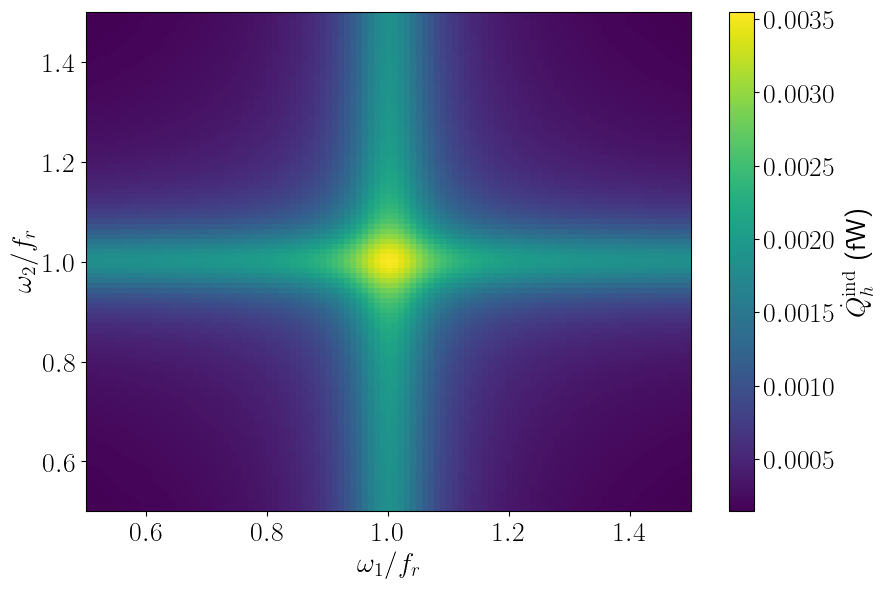

In [6]:
# Plotting the independent case
plt.figure(figsize=(9, 6))
rc('text',usetex=True)

cp = plt.imshow(
    (Q_ind), 
    extent=(w_vals.min(), w_vals.max(), w_vals.min(), w_vals.max()),
    aspect='auto',
    origin='lower'
)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel(r'$\omega_1/f_r$', fontsize=20)
plt.ylabel(r'$\omega_2/f_r$', fontsize=20)

cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$\dot Q^{\rm ind}_h$ (fW)', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()

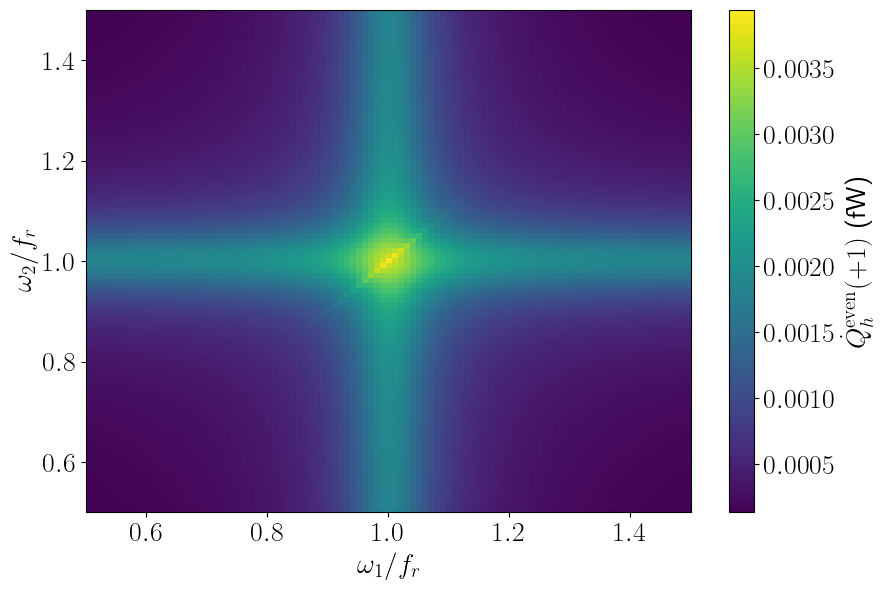

In [7]:
# Plotting the collective even (+1) case
plt.figure(figsize=(9, 6))
rc('text',usetex=True)

cp = plt.imshow(
    (Q_coll_sup),  
    extent=(w_vals.min(), w_vals.max(), w_vals.min(), w_vals.max()),
    aspect='auto',
    origin='lower'
)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel(r'$\omega_1/f_r$', fontsize=20)
plt.ylabel(r'$\omega_2/f_r$', fontsize=20)

cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$\dot Q_h^{\rm even} (+1)$ (fW)', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)
plt.tight_layout()

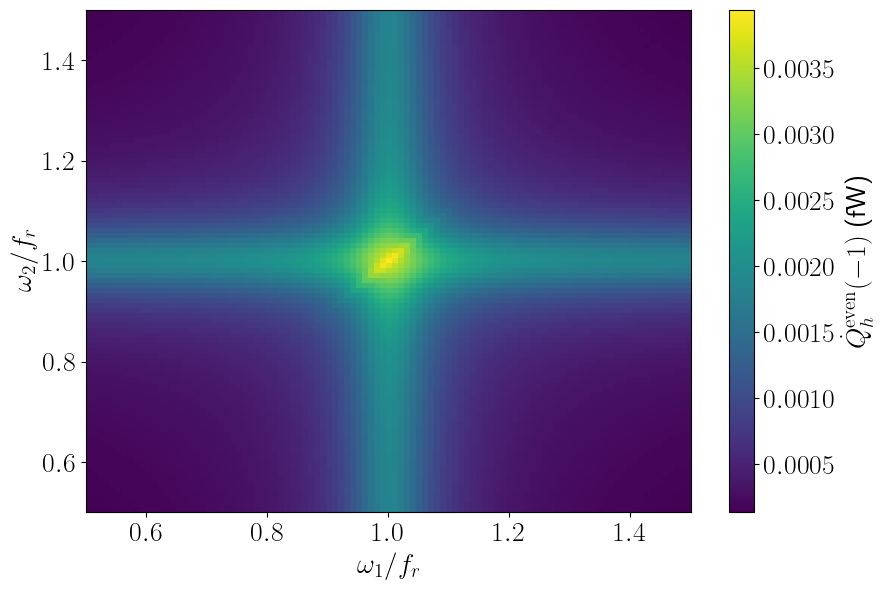

In [8]:
# Plotting the collective even (-1) case
plt.figure(figsize=(9, 6))
rc('text',usetex=True)

cp = plt.imshow(
    (Q_coll_sup_even),  
    extent=(w_vals.min(), w_vals.max(), w_vals.min(), w_vals.max()),
    aspect='auto',
    origin='lower'
)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel(r'$\omega_1/f_r$', fontsize=20)
plt.ylabel(r'$\omega_2/f_r$', fontsize=20)

cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$\dot Q_h^{\rm even} (-1)$ (fW)', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)
plt.tight_layout()

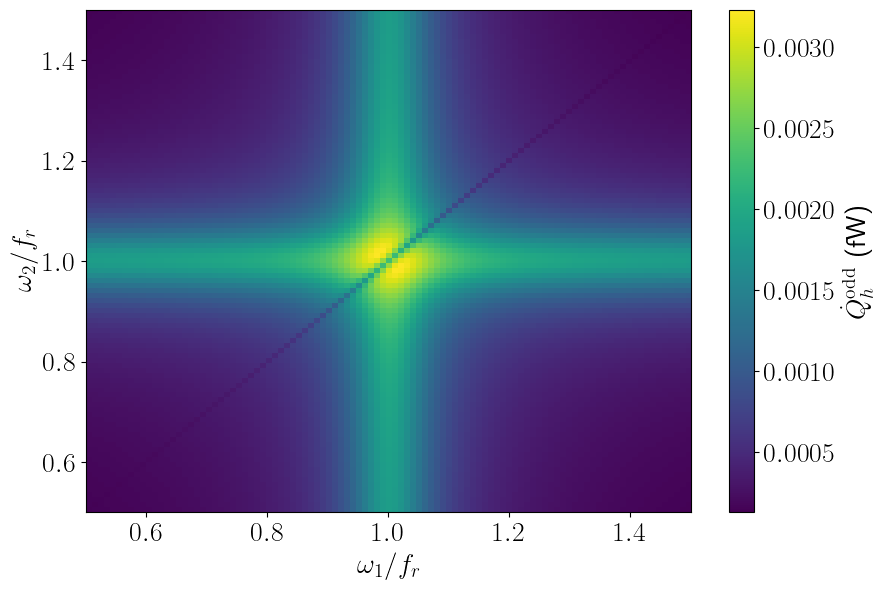

In [9]:
# Plotting the collective odd case
plt.figure(figsize=(9, 6))
rc('text',usetex=True)

cp = plt.imshow(
    (Q_coll_sub),  # negative heat current for display
    extent=(w_vals.min(), w_vals.max(), w_vals.min(), w_vals.max()),
    aspect='auto',
    origin='lower'
)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel(r'$\omega_1/f_r$', fontsize=20)
plt.ylabel(r'$\omega_2/f_r$', fontsize=20)

cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$\dot Q_h^{\rm odd}$ (fW)', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)
plt.tight_layout()

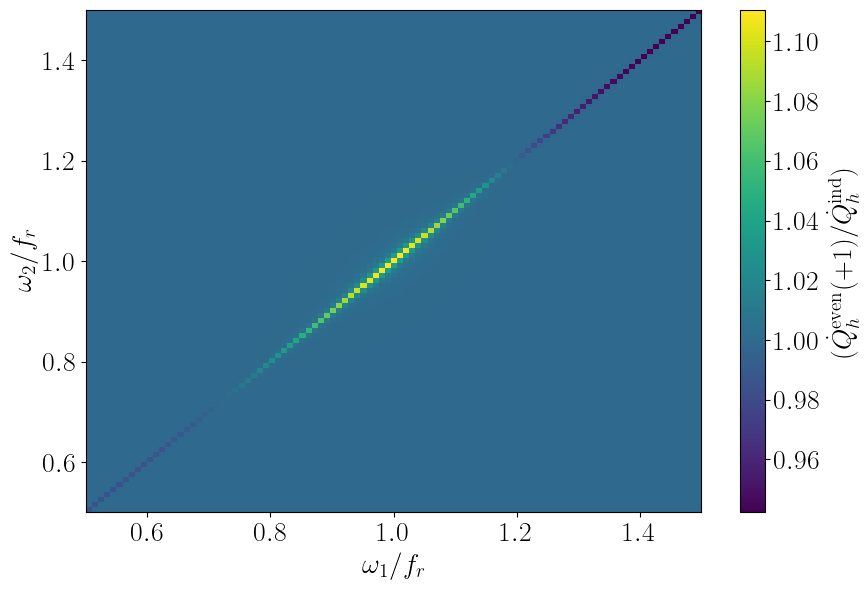

In [10]:
# Plotting the collective even case (+1) enhancement
plt.figure(figsize=(9, 6))
rc('text',usetex=True)

cp = plt.imshow(
    Ratio_sup,  
    extent=(w_vals.min(), w_vals.max(), w_vals.min(), w_vals.max()),
    aspect='auto',
    origin='lower'
)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.xlabel(r'$\omega_1/f_r$', fontsize=20)
plt.ylabel(r'$\omega_2/f_r$', fontsize=20)



# Catturo la colorbar in 'cbar'
cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$(\dot Q_h^{\rm even} (+1)/\dot Q_h^{\rm ind})$', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()

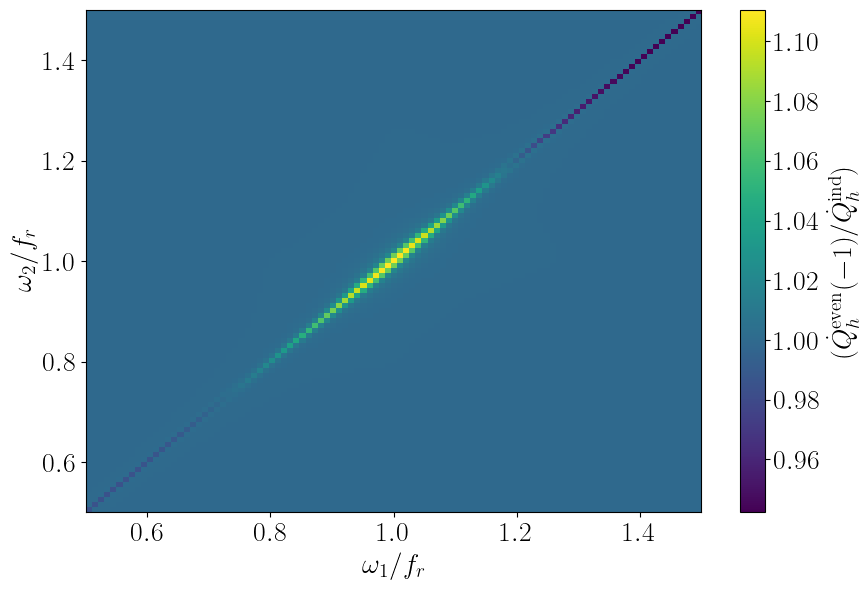

In [11]:
# Plotting the collective even case (-1) enhancement
plt.figure(figsize=(9, 6))
rc('text',usetex=True)

cp = plt.imshow(
    Ratio_sup_even,  
    extent=(w_vals.min(), w_vals.max(), w_vals.min(), w_vals.max()),
    aspect='auto',
    origin='lower'
)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.xlabel(r'$\omega_1/f_r$', fontsize=20)
plt.ylabel(r'$\omega_2/f_r$', fontsize=20)



# Catturo la colorbar in 'cbar'
cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$(\dot Q_h^{\rm even} (-1)/\dot Q_h^{\rm ind})$', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()

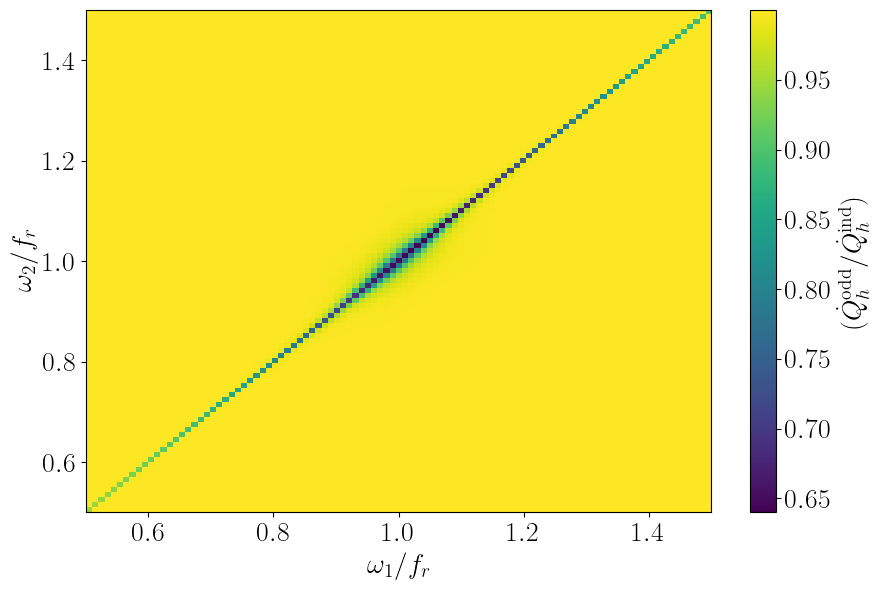

In [12]:
# Plotting the collective odd case suppression
plt.figure(figsize=(9, 6))
rc('text',usetex=True)

cp = plt.imshow(
    Ratio_sub,  
    extent=(w_vals.min(), w_vals.max(), w_vals.min(), w_vals.max()),
    aspect='auto',
    origin='lower'
)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.xlabel(r'$\omega_1/f_r$', fontsize=20)
plt.ylabel(r'$\omega_2/f_r$', fontsize=20)



# Catturo la colorbar in 'cbar'
cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$(\dot Q_h^{\rm odd}/\dot Q_h^{\rm ind})$', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()

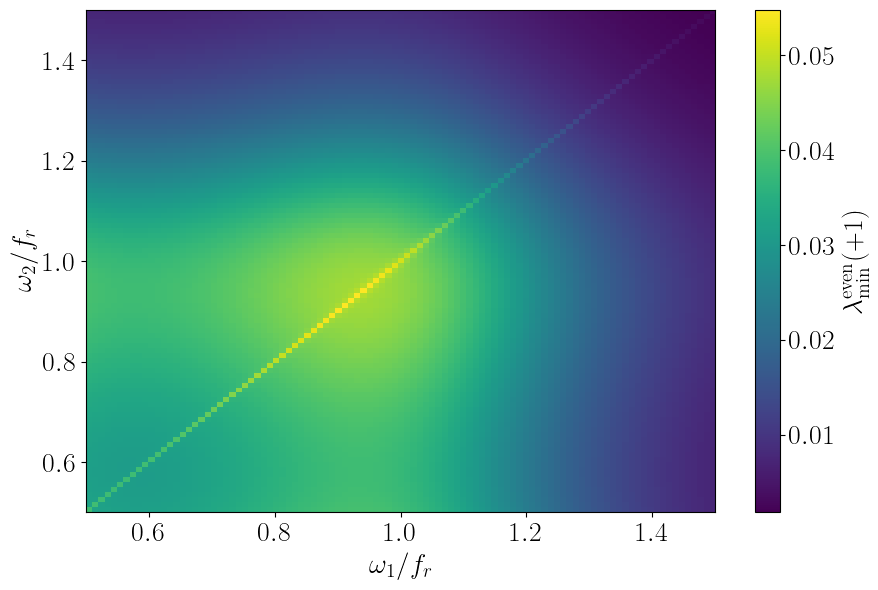

In [13]:
# Minimum eigenvalue check for collective even(+1) case
plt.figure(figsize=(9, 6))
rc('text',usetex=True)

cp = plt.imshow(
    Lambda_sup,  # negative heat current for display
    extent=(w_vals.min(), w_vals.max(), w_vals.min(), w_vals.max()),
    aspect='auto',
    origin='lower'
)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.xlabel(r'$\omega_1/f_r$', fontsize=20)
plt.ylabel(r'$\omega_2/f_r$', fontsize=20)



# Catturo la colorbar in 'cbar'
cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$\lambda_{\rm min}^{\rm even} (+1)$', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()

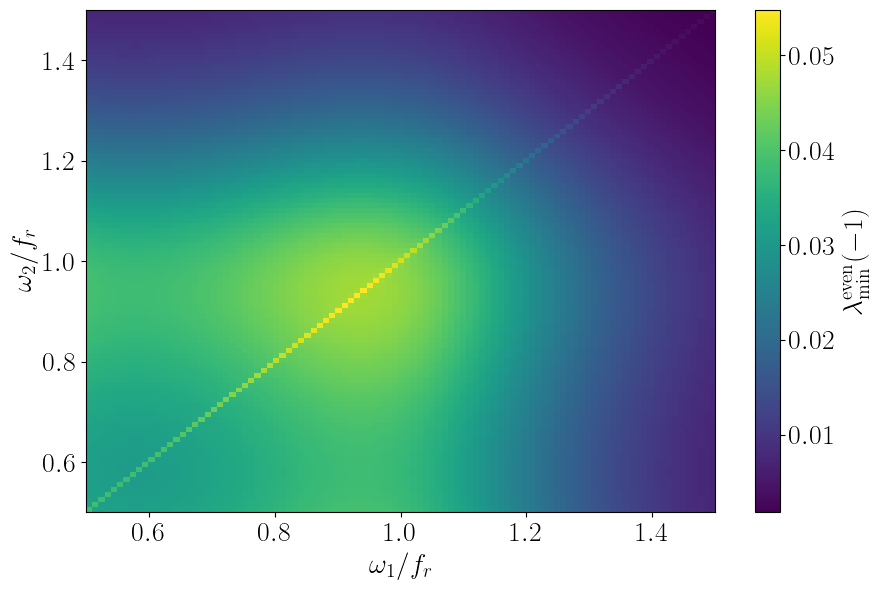

In [14]:
# Minimum eigenvalue check for collective even(-1) case
plt.figure(figsize=(9, 6))
rc('text',usetex=True)

cp = plt.imshow(
    Lambda_sup_even,  # negative heat current for display
    extent=(w_vals.min(), w_vals.max(), w_vals.min(), w_vals.max()),
    aspect='auto',
    origin='lower'
)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.xlabel(r'$\omega_1/f_r$', fontsize=20)
plt.ylabel(r'$\omega_2/f_r$', fontsize=20)



# Catturo la colorbar in 'cbar'
cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$\lambda_{\rm min}^{\rm even} (-1)$', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()

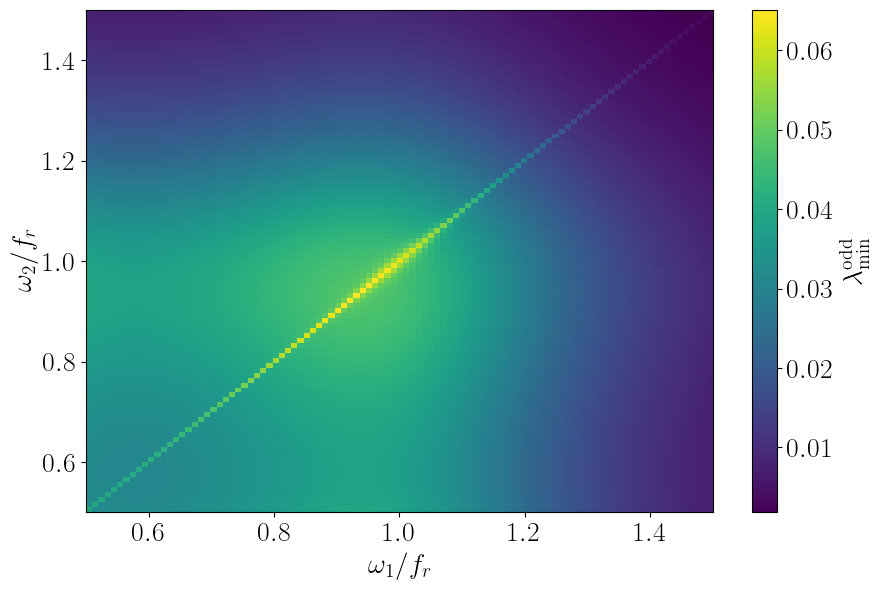

In [15]:
# Minimum eigenvalue check for collective odd case
plt.figure(figsize=(9, 6))
rc('text',usetex=True)

cp = plt.imshow(
    Lambda_sub,  # negative heat current for display
    extent=(w_vals.min(), w_vals.max(), w_vals.min(), w_vals.max()),
    aspect='auto',
    origin='lower'
)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.xlabel(r'$\omega_1/f_r$', fontsize=20)
plt.ylabel(r'$\omega_2/f_r$', fontsize=20)



# Catturo la colorbar in 'cbar'
cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$\lambda_{\rm min}^{\rm odd}$', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()

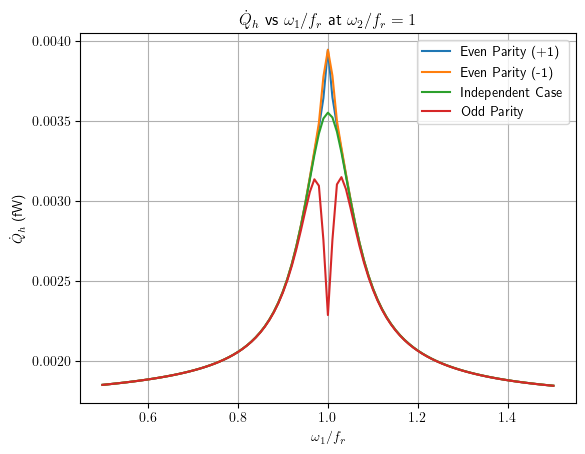

In [16]:
# Plotting a linecut of keeping one qubit at resonance and sweeping the other qubit for all 4 cases discussed

sup = (Q_coll_sup[:, 50]) # in fW
ind = (Q_ind[:, 50])
sub = (Q_coll_sub[:, 50])
sup_2 = (Q_coll_sup_even[:, 50])
#i1_axis = w_vals  # in mA

# Plot it

plt.plot(w_vals, sup, label = 'Even Parity (+1)')
plt.plot(w_vals, sup_2, label = 'Even Parity (-1)')
plt.plot(w_vals, ind, label = 'Independent Case')
plt.plot(w_vals, sub, label = 'Odd Parity')
plt.xlabel(r'$\omega_1/f_r$')
plt.ylabel(r'$\dot{Q}_h$ (fW)')
plt.title(r'$\dot{Q}_h$ vs $\omega_1/f_r$ at $\omega_2/f_r = 1$')
plt.legend()
plt.grid(True)
plt.show()
#np.max(horizontal_cut)

In [18]:
# Calculating the dependence of Heat Current at resonance for all 4 cases discussed againt the parasitic bath temperature

N2 = 1000
w0 = 1             # LC resonator frequency (sets the unit scale)
w1 = 1             # Qubit 1 frequency
w2 = 1.02          # Qubit 2 frequency for testing detuned case 
Qf_2 = 7.1798      # Resonator quality factor

# Bath coupling strengths
gamma_h_2   = 0.0075 # Hot bath coupling
gamma_c_2   = 0.0075 # Cold bath coupling
gamma_deph_2 = 0     # Pure dephasing (σ_z)
gamma_p = 0.001      # Parasitic bath relaxation


# Temperatures  (ℏ = k_B = 1)
T_h_2     = 1.2087                    # Hot bath
T_c_2     = 0.186                     # Cold bath
T_par = np.linspace(0.186, 1.673, N2) # Parasitic Bath


Q_ind_2   = np.zeros(N2)      # independent current
Q_coll_sup_2  = np.zeros(N2)  # collective current for even (+1) case
Q_coll_sub_2  = np.zeros(N2)  # collective current for odd case
Ratio_sup_2   = np.zeros(N2)  # enhancement factor for even (+1) case
Ratio_sub_2   = np.zeros(N2)  # suppression factor for odd case 
Q_coll_even_2 = np.zeros(N2)  # collective current for even (-1) case
Ratio_even_2 = np.zeros(N2)   # enhancement factor for even (-1) case



for k, T_p in enumerate(T_par):
    

    # Independent-bath steady state and current
    rho_ind = QH.rho_ss_termic_indepentend(
        w1, w1,
        gamma_p, T_p, gamma_deph_2,
        T_h_2, gamma_h_2, T_c_2, gamma_c_2,
        w0, Qf_2
    )
    Q_ind_2[k] = QH.Current_ind(w1, w1, rho_ind, T_h_2, gamma_h_2, w0, Qf_2)
    
    

    # Collective-bath steady state and current for even (+1) case
    rho_coll_sup = QH.rho_ss_termic_collective_sup(
        w1, w1,
        gamma_p, T_p, gamma_deph_2,
        T_h_2, gamma_h_2, T_c_2, gamma_c_2,
        w0, Qf_2
    )
    Q_coll_sup_2[k] = QH.Current_coll(w1, w1, rho_coll_sup, T_h_2, gamma_h_2, w0, Qf_2, Jm_h, Jp_h)
    Ratio_sup_2[k]  = Q_coll_sup_2[k] / Q_ind_2[k]
    
    
    # Collective-bath steady state and current for odd case
    rho_coll_sub = QH.rho_ss_termic_collective_sub(
        w1, w1,
        gamma_p, T_p, gamma_deph_2,
        T_h_2, gamma_h_2, T_c_2, gamma_c_2,
        w0, Qf_2
    )
    Q_coll_sub_2[k] = QH.Current_coll(w1, w1, rho_coll_sub, T_h_2, gamma_h_2, w0, Qf_2, Jm_h, Jp_h)
    Ratio_sub_2[k]  = Q_coll_sub_2[k] / Q_ind_2[k]
    
    
    
    # Collective-bath steady state and current for even(-1) case
    rho_coll_even_2 = QH.rho_ss_termic_collective_sup_2(
        w1, w1,
        gamma_p, T_p, gamma_deph_2,
        T_h_2, gamma_h_2, T_c_2, gamma_c_2,
        w0, Qf_2
    )
    Q_coll_even_2[k] = QH.Current_coll(w1, w1, rho_coll_even_2, T_h_2, gamma_h_2, w0, Qf_2, Jm_c, Jp_c)   
    Ratio_even_2[k]  = Q_coll_even_2[k] / Q_ind_2[k]
    

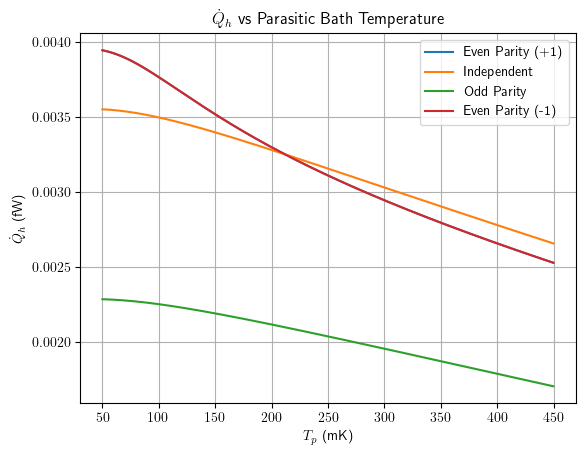

In [19]:
# Plotting parasitic bath dependence at resonance for all 4 cases discussed

T_parT = (T_par*5.6*10**9*6.626*10**(-34))/(1.38*10**(-23))
plt.plot(T_parT*1e3, Q_coll_sup_2, label = 'Even Parity (+1)')
plt.plot(T_parT*1e3, Q_ind_2, label = 'Independent')
plt.plot(T_parT*1e3, Q_coll_sub_2, label = 'Odd Parity')
plt.plot(T_parT*1e3, Q_coll_even_2, label = 'Even Parity (-1)')
plt.xlabel(r'$T_p$ (mK)')
plt.ylabel(r'$\dot{Q}_h$ (fW)')
plt.title(r'$\dot{Q}_h$ vs Parasitic Bath Temperature')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Calculating the dependence of Heat Current at resonance for all 4 cases discussed againt pure dephasing

N3 = 1000
gamma_p_2 = 0.001  # Parasitic bath relaxation
gamma_deph_3  = np.linspace(0.0001, 0.01, N3)  # Pure dephasing (σ_z)

# Temperatures  (ℏ = k_B = 1)
T_local = 0.186    # Parasitic bath
T_h     = 1.2087   # Hot bath
T_c     = 0.186    # Cold bath


Q_ind_3   = np.zeros(N3)      # independent current
Q_coll_sup_3  = np.zeros(N3)  # collective current for even (+1) case
Q_coll_sub_3  = np.zeros(N3)  # collective current for odd case 
Ratio_sup_3   = np.zeros(N3)  # enhancement factor for even (+1) case
Ratio_sub_3   = np.zeros(N3)  # suppression factor for odd case
Q_coll_even_3 = np.zeros(N3)  # collective current for even (+1) case
Ratio_even_3 = np.zeros(N3)


for k, gamma_d in enumerate(gamma_deph_3):

    # Independent-bath steady state and current
    rho_ind = QH.rho_ss_termic_indepentend(
        1, 1,
        gamma_p_2, T_local, gamma_d,
        T_h, gamma_h, T_c, gamma_c,
        w0, Qf
    )
    Q_ind_3[k] = QH.Current_ind(1, 1, rho_ind, T_h, gamma_h, w0, Qf)

    # Collective-bath steady state and current for even case (+1)
    rho_coll_sup = QH.rho_ss_termic_collective_sup(
        1, 1,
        gamma_p_2, T_local, gamma_d,
        T_h, gamma_h, T_c, gamma_c,
        w0, Qf
    )
    Q_coll_sup_3[k] = QH.Current_coll(1, 1, rho_coll_sup, T_h, gamma_h, w0, Qf, Jm_h, Jp_h)


    Ratio_sup_3[k]  = Q_coll_sup_3[k] / Q_ind_3[k]
    
    
    # Collective-bath steady state and current for odd case
    rho_coll_sub = QH.rho_ss_termic_collective_sub(
        1, 1,
        gamma_p_2, T_local, gamma_d,
        T_h, gamma_h, T_c, gamma_c,
        w0, Qf
    )
    Q_coll_sub_3[k] = QH.Current_coll(1, 1, rho_coll_sub, T_h, gamma_h, w0, Qf, Jm_h, Jp_h)


    Ratio_sub_3[k]  = Q_coll_sub_3[k] / Q_ind_3[k]
    
    
    # Collective-bath steady state and current for even case (-1)
    rho_coll_even_3 = QH.rho_ss_termic_collective_sup_2(
        1, 1,
        gamma_p_2, T_local, gamma_d,
        T_h, gamma_h, T_c, gamma_c,
        w0, Qf
    )
    Q_coll_even_3[k] = QH.Current_coll(1, 1, rho_coll_even_3, T_h, gamma_h, w0, Qf, Jm_c, Jp_c)


    Ratio_even_3[k]  = Q_coll_even_3[k] / Q_ind_3[k]
    
    

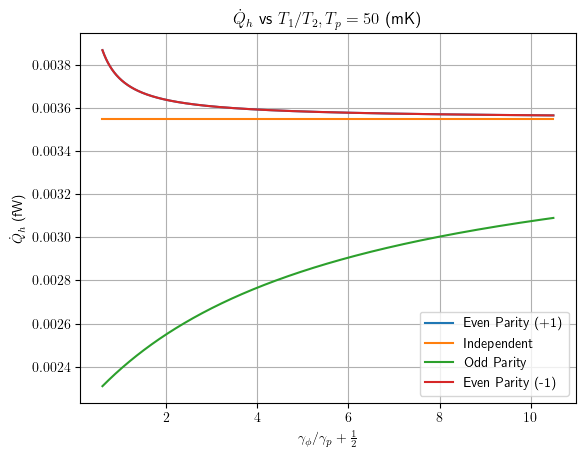

In [21]:
# Plotting pure dephasing dependence at resonance for all 4 cases discussed

plt.plot(gamma_deph_3/gamma_p_2 + 0.5, Q_coll_sup_3, label = 'Even Parity (+1)')
plt.plot(gamma_deph_3/gamma_p_2 + 0.5, Q_ind_3, label = 'Independent')
plt.plot(gamma_deph_3/gamma_p_2 + 0.5, Q_coll_sub_3, label = 'Odd Parity')
plt.plot(gamma_deph_3/gamma_p_2 + 0.5, Q_coll_even_3, label = 'Even Parity (-1)')
plt.xlabel(r'$\gamma_{\phi}/\gamma_p + \frac{1}{2}$')
plt.ylabel(r'$\dot{Q}_h$ (fW)')
plt.title(r'$\dot{Q}_h$ vs $T_1/T_2, T_p = 50$ (mK)')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# Calculating the dependence of Heat Current at resonance for all 4 cases discussed againt Hot bath coupling strength
# while keeping cold bath fixed

N4 = 1000
Qf_3 = 7.1798      # LC Resonator Quality Factor
gamma_p_3 = 0.001  # Parasitic relaxation
gamma_deph_4  = 0  # Pure dephasing (σ_z)

# Temperatures  (ℏ = k_B = 1)
T_local = 0.186                         # Parasitic bath
T_h     = 1.2087                        # Hot bath
T_c     = 0.186                         # Cold bath   
gamma_h_3 = np.linspace(0.001, 0.1, N4) # Hot bath coupling
gamma_c_3 = gamma_h_3                   # Cold bath coupling


Q_ind_4   = np.zeros(N4)      # independent current
Q_coll_sup_4  = np.zeros(N4)  # collective current for even case (+1)
Q_coll_sub_4  = np.zeros(N4)  # collective current for odd case
Ratio_sup_4   = np.zeros(N4)  # enhancement factor for even case (+1)
Ratio_sub_4   = np.zeros(N4)  # suppression factor for odd case
Q_coll_even_4 = np.zeros(N4)  # collective current for even case (-1)
Ratio_even_4 = np.zeros(N4)   # enhancement factor for even case (-1)


for k, gh in enumerate(gamma_h_3):

    # Independent-bath steady state and current
    rho_ind = QH.rho_ss_termic_indepentend(
        1, 1,
        gamma_p_3, T_local, gamma_deph_4,
        T_h, gh, T_c, gamma_c_3[k],
        w0, Qf_3
    )
    Q_ind_4[k] = QH.Current_ind(1, 1, rho_ind, T_h, gh, w0, Qf_3)
    
    

    # Collective-bath steady state and current for even case (+1)
    rho_coll_sup = QH.rho_ss_termic_collective_sup(
        1, 1,
        gamma_p_3, T_local, gamma_deph_4,
        T_h, gh, T_c, gamma_c_3[k],
        w0, Qf_3
    )
    Q_coll_sup_4[k] = QH.Current_coll(1, 1, rho_coll_sup, T_h, gh, w0, Qf_3, Jm_h, Jp_h)


    Ratio_sup_4[k]  = Q_coll_sup_4[k] / Q_ind_4[k]
    
    
    # Collective-bath steady state and current for odd case
    rho_coll_sub = QH.rho_ss_termic_collective_sub(
        1, 1,
        gamma_p_3, T_local, gamma_deph_4,
        T_h, gh, T_c, gamma_c_3[k],
        w0, Qf_3
    )
    Q_coll_sub_4[k] = QH.Current_coll(1, 1, rho_coll_sub, T_h, gh, w0, Qf_3, Jm_h, Jp_h)


    Ratio_sub_4[k]  = Q_coll_sub_4[k] / Q_ind_4[k]
    
    
    
    # Collective-bath steady state and current for even case (-1)
    rho_coll_even_4 = QH.rho_ss_termic_collective_sup_2(
        1, 1,
        gamma_p_3, T_local, gamma_deph_4,
        T_h, gh, T_c, gamma_c_3[k],
        w0, Qf_3
    )
    Q_coll_even_4[k] = QH.Current_coll(1, 1, rho_coll_even_4, T_h, gh, w0, Qf_3, Jm_c, Jp_c)


    Ratio_even_4[k]  = Q_coll_even_4[k] / Q_ind_4[k]
    

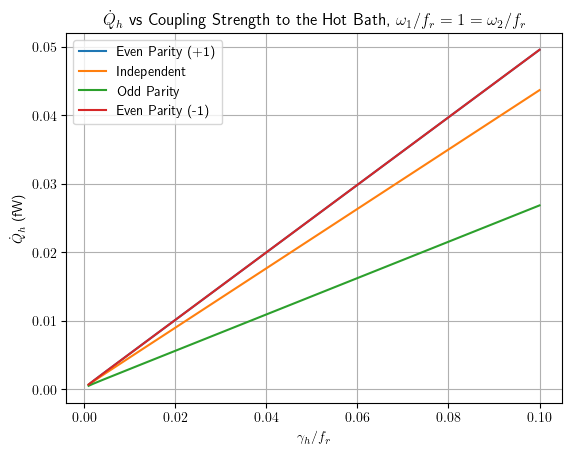

In [23]:
# Plotting hot bath coupling dependence at resonance for all 4 cases discussed
plt.plot(gamma_h_3, Q_coll_sup_4, label = 'Even Parity (+1)')
plt.plot(gamma_h_3, Q_ind_4, label = 'Independent')
plt.plot(gamma_h_3, Q_coll_sub_4, label = 'Odd Parity')
plt.plot(gamma_h_3, Q_coll_even_4, label = 'Even Parity (-1)')
plt.xlabel(r'$\gamma_{h}/f_r$')
plt.ylabel(r'$\dot{Q}_h$ (fW)')
plt.title(r'$\dot{Q}_h$ vs Coupling Strength to the Hot Bath, $\omega_1/f_r = 1 = \omega_2/f_r$')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# Calculating Hot Bath Temperature Dependence at resonance for all 4 cases discussed
N5 = 1000

T_h_3     = np.linspace(0.372, 1.2087, N5) # Hot Bath Temperature 
gamma_h_4 = 0.0075                         # Hot Bath Coupling
gamma_c_4 = gamma_h_4                      # Cold Bath Coupling


Q_ind_5   = np.zeros(N5)   # independent current
Q_coll_sup_5  = np.zeros(N5)  # collective current for even (+1) case
Q_coll_sub_5  = np.zeros(N5)  # collective current for odd case
Ratio_sup_5  = np.zeros(N5)   # enhancement factor for even (+1) case
Ratio_sub_5   = np.zeros(N5)  # suppression factor for odd case
Q_coll_even_5  = np.zeros(N5) # collective current for even (-1) case
Ratio_even_5  = np.zeros(N5)  # enhancement factor for even (-1) case


for k, Th in enumerate(T_h_3):

    # Independent-bath steady state and current
    rho_ind = QH.rho_ss_termic_indepentend(
        1, 1,
        gamma_p_3, T_local, gamma_deph_4,
        Th, gamma_h_4, T_c, gamma_c_4,
        w0, Qf_3
    )
    Q_ind_5[k] = QH.Current_ind(1, 1, rho_ind, Th, gamma_h_4, w0, Qf_3)
    

    # Collective-bath steady state and current for even (+1) case
    rho_coll_sup = QH.rho_ss_termic_collective_sup(
        1, 1,
        gamma_p_3, T_local, gamma_deph_4,
        Th, gamma_h_4, T_c, gamma_c_4,
        w0, Qf_3
    )
    Q_coll_sup_5[k] = QH.Current_coll(1, 1, rho_coll_sup, Th, gamma_h_4, w0, Qf_3, Jm_h, Jp_h)


    Ratio_sup_5[k]  = Q_coll_sup_5[k] / Q_ind_5[k]
    
    
    # Collective-bath steady state and current for odd case
    rho_coll_sub = QH.rho_ss_termic_collective_sub(
        1, 1,
        gamma_p_3, T_local, gamma_deph_4,
        Th, gamma_h_4, T_c, gamma_c_4,
        w0, Qf_3
    )
    Q_coll_sub_5[k] = QH.Current_coll(1, 1, rho_coll_sub, Th, gamma_h_4, w0, Qf_3, Jm_h, Jp_h)


    Ratio_sub_5[k]  = Q_coll_sub_5[k] / Q_ind_5[k]
    
    
    # Collective-bath steady state and current for even (-1) case
    rho_coll_even_5 = QH.rho_ss_termic_collective_sup_2(
        1, 1,
        gamma_p_3, T_local, gamma_deph_4,
        Th, gamma_h_4, T_c, gamma_c_4,
        w0, Qf_3
    )
    Q_coll_even_5[k] = QH.Current_coll(1, 1, rho_coll_even_5, Th, gamma_h_4, w0, Qf_3, Jm_c, Jp_c)


    Ratio_even_5[k]  = Q_coll_even_5[k] / Q_ind_5[k]

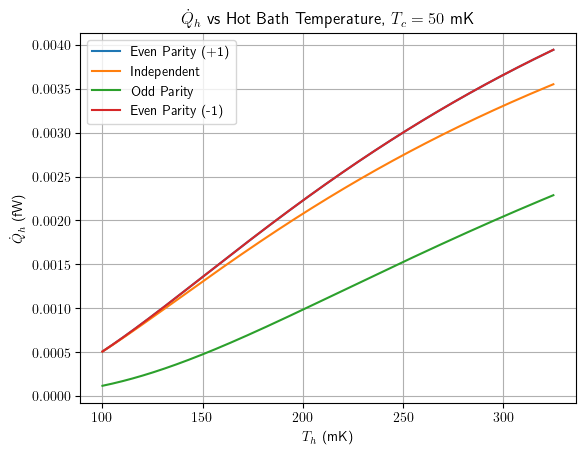

In [25]:
# Plotting Hot Bath Temperature dependence at resonance for all 4 cases discussed
T = (T_h_3*5.6*10**9*6.626*10**-34)/(1.38*10**-23)
plt.plot(T*1e3, Q_coll_sup_5, label = 'Even Parity (+1)')
plt.plot(T*1e3, Q_ind_5, label = 'Independent')
plt.plot(T*1e3, Q_coll_sub_5, label = 'Odd Parity')
plt.plot(T*1e3, Q_coll_even_5, label = 'Even Parity (-1)')
plt.xlabel(r'$T_{h}$ (mK)')
plt.ylabel(r'$\dot{Q}_h$ (fW)')
plt.title(r'$\dot{Q}_h$ vs Hot Bath Temperature, $T_c = 50$ mK')
plt.legend()
plt.grid(True)
plt.show()

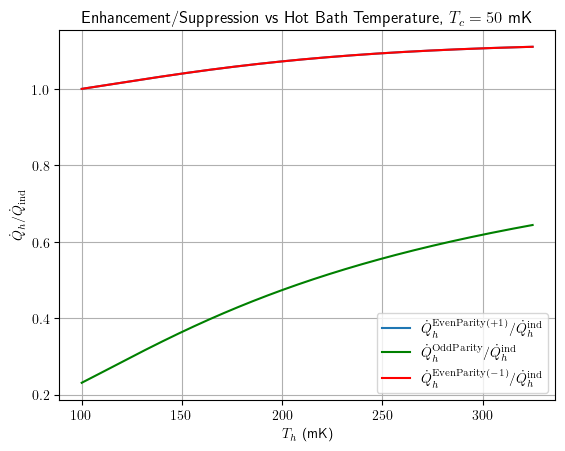

In [29]:
# Plotting Enhancement and Suppression against the hot bath temperature

plt.plot(T*1e3, Ratio_sup_5, label = r'$\dot{Q}_h^{\rm Even Parity (+1)}/\dot{Q}_h^{\rm ind}$')
plt.plot(T*1e3, Ratio_sub_5, label = r'$\dot{Q}_h^{\rm Odd Parity}/\dot{Q}_h^{\rm ind}$', color = "green")
plt.plot(T*1e3, Ratio_even_5, label = r'$\dot{Q}_h^{\rm Even Parity (-1)}/\dot{Q}_h^{\rm ind}$', color = "red")
plt.xlabel(r'$T_{h}$ (mK)')
plt.ylabel(r'$\dot{Q}_h/\dot{Q}_{\rm ind}$')
plt.legend()
plt.title(r'Enhancement/Suppression vs Hot Bath Temperature, $T_c = 50$ mK')
plt.grid(True)
plt.show()

In [27]:
# Visualizing the loss of the feature we see for the odd case at low values of bath coupling as the coupling is increased

N6 = 101
N7 = 50
   
gamma_h_4 = np.linspace(0.001, 0.1, N7) # Hot bath coupling

w_vals_2 = np.linspace(0.5, 1.5, 101)   # frequency sweep for qubit 1

gamma_c_4 = gamma_h_4                   # Cold bath coupling


Q_ind_6   = np.zeros((N6, N7))       # independent current
Q_coll_sup_6  = np.zeros((N6, N7))   # collective current for even case (+1)
Q_coll_sub_6  = np.zeros((N6, N7))    # collective current for odd case
Ratio_sup_6   = np.zeros((N6, N7))    # enhancement factor for even case (+1)
Ratio_sub_6   = np.zeros((N6, N7))    # suppression factor for odd case


for i, w1 in enumerate(w_vals_2):
    for j, gh in enumerate(gamma_h_4):

        # Independent-bath steady state and current
        rho_ind = QH.rho_ss_termic_indepentend(
            w1, 1,
            gamma_p_3, T_local, gamma_deph_4,
            T_h, gh, T_c, gamma_c_4[j],
            w0, Qf_3
        )
        Q_ind_6[i, j] = QH.Current_ind(w1, 1, rho_ind, T_h, gh, w0, Qf_3)
        

        # Collective-bath steady state and current for even case (+1)
        rho_coll_sup = QH.rho_ss_termic_collective_sup(
            w1, 1,
            gamma_p_3, T_local, gamma_deph_4,
            T_h, gh, T_c, gamma_c_4[j],
            w0, Qf_3
        )
        Q_coll_sup_6[i, j] = QH.Current_coll(w1, 1, rho_coll_sup, T_h, gh, w0, Qf_3, Jm_h, Jp_h)


        Ratio_sup_6[i, j]  = Q_coll_sup_6[i, j] / Q_ind_6[i, j]
        
        
        # Collective-bath steady state and current for odd case
        rho_coll_sub = QH.rho_ss_termic_collective_sub(
            w1, 1,
            gamma_p_3, T_local, gamma_deph_4,
            T_h, gh, T_c, gamma_c_4[j],
            w0, Qf_3
        )
        Q_coll_sub_6[i, j] = QH.Current_coll(w1, 1, rho_coll_sub, T_h, gh, w0, Qf_3, Jm_h, Jp_h)


        Ratio_sub_6[i, j]  = Q_coll_sub_6[i, j] / Q_ind_6[i, j]

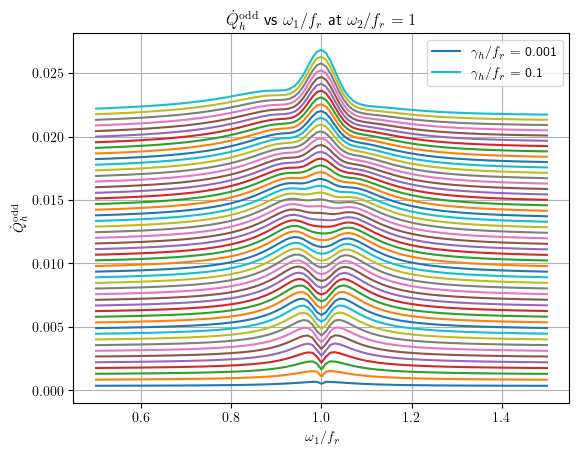

In [28]:
# Plotting by keeping one qubit at resonance and sweeping the other qubit for all 4 cases discussed as coupling strength is increased
# for the even (+1) case and the odd case
for i, gh in enumerate(gamma_h_4):
    if i == 0 or i == 49:
        plt.plot(w_vals, Q_coll_sub_6[:, i], label=f"$\gamma_h/f_r$ = {gh}")
    else:
        plt.plot(w_vals, Q_coll_sub_6[:, i])

plt.xlabel(r'$\omega_1/f_r$')
plt.ylabel(r'$\dot{Q}_h^{\rm odd}$')
plt.title(r'$\dot{Q}_h^{\rm odd}$ vs $\omega_1/f_r$ at $\omega_2/f_r = 1$')
plt.legend()
plt.grid(True)
plt.show()